# Lab04 - (Extra) Plotting with Tensorboard

To observe if the model is training well and identify if the model has converged, it is important to monitor the loss function vs iteration. To do this, we can use [Tensorboard](https://pytorch.org/docs/stable/tensorboard.html) which is a tool designed for visualizing the results of neural network training runs. It provides the visualization needed for checking your machine learning model. Two main uses of tensorboard are to 
1. Visualize the constructed computational graph via `writer.add_graph` method.
2. Track and visualize metrics such as loss and accuracy via `writer.add_scaler` method

#### Objectives:
1. Learn how to use Tensorboard to monitor training metrics such as training loss and accuracy and visualize the graph for our model.

#### Task:
Visualize the training of the CIFAR10 model using Tensorboard. 

### Content:

1. [Load Training Set and Construct Network](#1.-Load-Training-Set-and-Construct-Network)
2. [Visualize a Graph](#2.-Visualize-a-Graph)
3. [Monitoring a Scalar Value](#3.-Monitoring-a-Scalar-Value)
4. [Comparing a Scalar Across Different Runs](#4.-Comparing-a-Scalar-Across-Different-Runs)
5. [Grouping Plots](#5.-Grouping-Plots)
6. [Plotting Multiple Plots in the Same Figure](#6.-Plotting-Multiple-Plots-in-the-Same-Figure)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
cd "/content/gdrive/My Drive/UCCD3074_Labs/UCCD3074_Lab4"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from cifar10 import CIFAR10

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

import time

%load_ext autoreload
%autoreload 2

---
# 1. Load Training Set and Construct Network
The following code loads the train and test set for CIFAR10.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainset = CIFAR10(train=True,  transform=transform, num_samples=10000, download=True)
testset  = CIFAR10(train=False,  transform=transform, num_samples=2000, download=True)
classes = trainset.classes

trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader  = DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

The following code constructs the network model

In [ ]:
class Network(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        return x
    
def build_model():
    net = Network()    
    if torch.cuda.is_available():
        net = net.cuda()
    return net

In [ ]:
net = build_model()

---
# 2. Visualize a Graph  

One of TensorBoard’s strengths is its ability to visualize complex model structures. Let’s visualize the model we built. First, we import `SummaryWriter` from `torch.utils.tensorboard` and define a [SummaryWriter](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter) object:

`writer = SummaryWriter(log_dir)`

where `log_dir` is the directory to store the written item. 

In [ ]:
# ...

To create the computational graph, `summarywriter` requires you to supply a batch data. 

In [ ]:
# ...

Now, let's add the graph to tensorboard through the command [`add_graph`](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter.add_graph)

In [ ]:
# ...

After we have finish updating the graph, close the writer.

In [ ]:
# ...

Now, let's open up tensorboard on Colab to view the graph that we have just writtten to `runs/graph`

In [ ]:
# ...

In [ ]:
# ...

---
# 3. Monitoring a Scalar Value

Besides displaying a graph, Tensorboard can be be used to monitor a scalar value over different time step. We can use it to monitor the the training/testing accuracy/loss.


## Add scalar during training

To monitor a variable, call the function [`add_scalar`](https://pytorch.org/docs/stable/tensorboard.html#torch.utils.tensorboard.writer.SummaryWriter.add_scalar) to update the variable  continuously during training.  

```
writer.add_scalar(tag, scalar_value, step)
```
where the input arguments are:
* `tag` (string) is the name of the experiment. Tensorboard can show multiple logs from *different* experiments with the *same* tag on the same figure. This allows easy comparison.
* `scalar_value` (a scalar value) is the value to be saved and monitored, e.g., the accuracy or loss value.  
* `step` is the training step when `scalar_value` is generated. 


In the `train` function below, we monitor the training loss as the training commences. We shall save the `train_loss` to `tensorboard` (line 54) every 100 batch cycles (line 47). 


In [ ]:
import time

def train (model, writer, lr=0.001, num_epochs=5, loop_per_val=200):

    # set the optimizer
    optimizer = optim.SGD(net.parameters(), lr=lr)
    
    # set the criterion
    criterion = nn.CrossEntropyLoss()
    
    # set to training mode
    net.train()

    # train the model 
    for e in range(num_epochs):

        running_loss = 0
        running_count = 0

        for i, (inputs, labels) in enumerate(trainloader):

            # transfer input to GPU
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            # set grad to zero
            net.zero_grad()

            # forward propagation
            outputs = net(inputs)

            # compute loss
            loss = criterion(outputs, labels)

            # backward propagation
            loss.backward()

            # update model
            optimizer.step()

            # compute running loss and validation
            running_loss += loss.item()
            running_count +=1

            # display the averaged loss value every 100 cycles
            if i % loop_per_val == loop_per_val - 1:                
                train_loss = running_loss / loop_per_val
                running_loss = 0. 
                running_count = 0
                print(f'[Epoch {e+1:2d}/{num_epochs:d} Iter {e*len(trainloader)+i:5d}]: train_loss = {train_loss:.4f}')

                # Update tensorboard
                # ...
               
    return model

Next, create a summary writer object. We shall name our `log_dir` based on the learning rate (`lr`) settings since we will be comparing different `lr` settings later.

In [ ]:
# ...

In [ ]:
net = build_model()
net = train (net, ..., lr = 0.001, num_epochs=3, loop_per_val=200)

In [ ]:
# ...

Scroll up to the Tensorboard cell above and check the plot. It should look like the following figure.

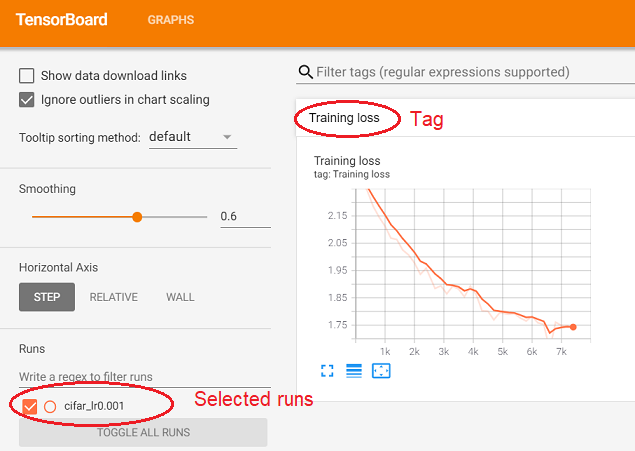

---
# 4. Comparing a Scalar Across Different Runs

In the following, we shall use a higher learning rate (0.01). Tensorboard will visualize all experiments with the same **tag**  in the same plot. This allows you to compare the results from different experiments in the same figure. In this case, the tag name is `Training loss`.

In [ ]:
net = build_model()
# ...
net = train (net, ..., lr = 0.01, num_epochs=3, loop_per_val=200)
# ...

Scroll up to the Tensorboard cell to observe the result. You should see something similar to the figure below. Tensorboard clearly allows you to compare the monitored value for different runs with different settings easily. To load the data automatically, enable "reload data" and set the reload period to the minimum settings of 30.

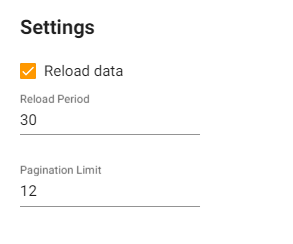

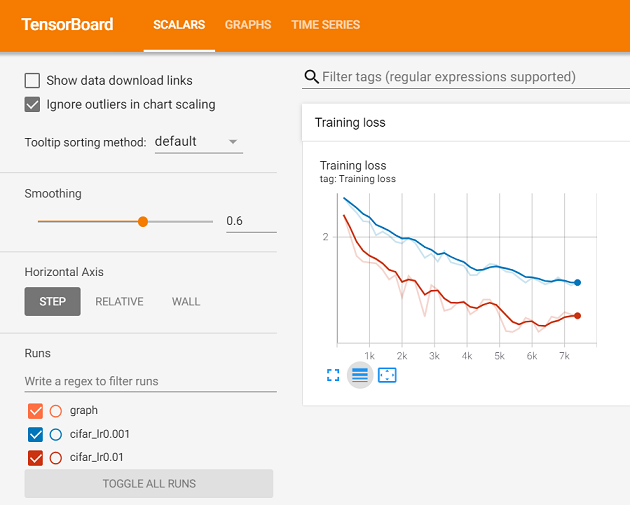

---
# 5. Grouping Plots 

Tensorboard allows you to log multiple information for one experiment. In the following, we shall log 3 different plots:
1. Train loss
2. Test loss
3. Test error

To avoid cluttering the UI, we can **group** the plots by naming them hierarchically. For example, `Loss/train` and `Loss/test` will be grouped together, while `Error/test` will be grouped separately in the TensorBoard interface.

First, let's create our evaluation function to compute the error of a given dataset.

In [ ]:
def evaluate(model, dataloader):
    num_wrong = 0
    test_loss = 0
    total = 0
    
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for X, Y in dataloader:
            # transfer input to GPU
            if torch.cuda.is_available():
                X = X.cuda()
                Y = Y.cuda()

            Yhat = model(X)
            
            # compute test loss
            test_loss += criterion(Yhat, Y).item()
            
            # compute error
            _, predicted = Yhat.max(axis=1)
            num_wrong += (predicted != Y).sum().item()
            
            total += len(Y)
        
    return num_wrong/total, test_loss/total

The following code computes the (1) training loss, (2) testing loss and (3) testing error every 100 (batch) iteration. Each time it computes the loss, it will then update tensorboard by calling the command `writer.add_scaler` (lines 56-58) for every values that we want to monitor.

In [ ]:
def train2 (model, writer, lr=0.001, num_epochs=5, loop_per_val=200):

    # set the optimizer
    optimizer = optim.SGD(net.parameters(), lr=lr)
    
    # set the criterion
    criterion = nn.CrossEntropyLoss()
    
    # set to training mode
    net.train()
    
    # train the model 
    for e in range(num_epochs):

        running_loss = 0
        running_count = 0

        for i, (inputs, labels) in enumerate(trainloader):

            # transfer input to GPU
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            # set grad to zero
            net.zero_grad()

            # forward propagation
            outputs = net(inputs)

            # compute loss
            loss = criterion(outputs, labels)

            # backward propagation
            loss.backward()

            # update model
            optimizer.step()

            # compute running loss and validation
            running_loss += loss.item()
            running_count +=1

            # display the averaged loss value every 100 cycles
            if i % loop_per_val == loop_per_val - 1:                
                train_loss = running_loss / loop_per_val
                running_loss = 0. 
                running_count = 0
                
                test_error, test_loss = evaluate(net, testloader)

                print(f'[Epoch {e+1:2d}/{num_epochs:d} Iter {e*len(trainloader)+i}]: train_loss = {train_loss:.4f}, test_loss = {test_loss:.4f} | test error: {test_error:.4f}')
                
                # Update tensorboard
                # ...
                # ...
                w# ...
                
    return model

Now, let's build the model and log the training loss, test loss and test error.

In [ ]:
net = build_model()
# ...
net = train2 (net, ..., lr = 0.01, num_epochs=3, loop_per_val=200)
# ...

Scroll up to the Tensorboard cell to observe the result. You should see something similar to the figure below.

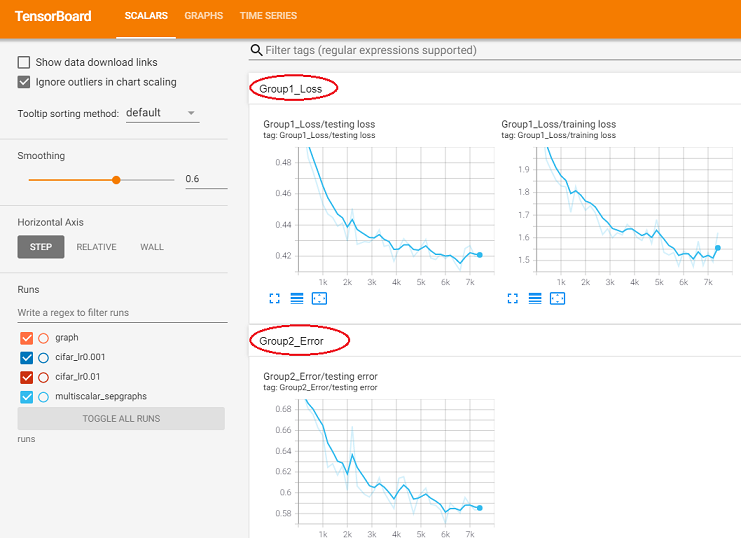

---
# 6. Plotting Multiple Plots in the Same Figure

You can also plot multiple scalar data in the same summary. To do that. You need to use the command `writer.addscalars` rather than `writer.addscalar`.

In [ ]:
def train3 (model, writer, lr=0.001, num_epochs=5, loop_per_val=200):

    # set the optimizer
    optimizer = optim.SGD(net.parameters(), lr=lr)
    
    # set the criterion
    criterion = nn.CrossEntropyLoss()
    
    # set to training mode
    net.train()
    

    # train the model 
    for e in range(num_epochs):

        running_loss = 0
        running_count = 0

        for i, (inputs, labels) in enumerate(trainloader):

            # transfer input to GPU
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()

            # set grad to zero
            net.zero_grad()

            # forward propagation
            outputs = net(inputs)

            # compute loss
            loss = criterion(outputs, labels)

            # backward propagation
            loss.backward()

            # update model
            optimizer.step()

            # compute running loss and validation
            running_loss += loss.item()
            running_count +=1

            # display the averaged loss value every 100 cycles
            if i % loop_per_val == loop_per_val - 1:                
                train_loss = running_loss / loop_per_val
                running_loss = 0. 
                running_count = 0
                
                _, test_loss = evaluate(net, testloader)

                print(f'[Epoch {e+1:2d}/{num_epochs:d} Iter {e*len(trainloader)+i}]: train_loss = {train_loss:.4f}, test_loss = {test_loss:.4f}')
                
                # Update tensorboard
                # ...
                
                
    return model

Now, let's build the model and log the training loss and test loss.

In [ ]:
net = build_model()
# ...
net = train3 (net, ..., lr = 0.01, num_epochs=3, loop_per_val=200)
# ...

Scroll up to the Tensorboard cell to observe the result. You should see something similar to the figure below.

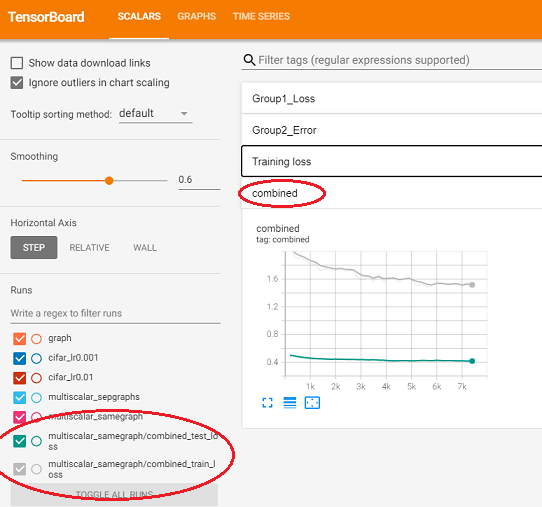

---

# 8. Other uses of Tensorboard

Besides, you can explore the following output to tensorboard:
1. Displaying images via the `writer.add_image` method
2. Displaying audio via the `writer.add_audio` method
3. Displaying video via the `writer.add_video` method
4. Displaying histogram via the `writer.add_histogram` method
5. Disualize the lower dimensional representation of higher dimensional data through the `add_embedding` method